<a href="https://colab.research.google.com/github/Keerthana0309/California-housing-data/blob/master/California_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

**California housing data and** **preprocessing**

In [5]:
cal_housing = fetch_california_housing()

In [10]:
cal_housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [51]:
cal_housing.corwith()

AttributeError: ignored

In [24]:
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [25]:
X
X.shape

(20640, 8)

In [21]:
y -= y.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,    #split the data
                                                   random_state=0)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
y

array([ 2.45744183,  1.51644183,  1.45244183, ..., -1.14555817,
       -1.22155817, -1.17455817])

In [27]:
print('Data Points:', y.shape,'\n Some samples are:', y)

Data Points: (20640,) 
 Some samples are: [ 2.45744183  1.51644183  1.45244183 ... -1.14555817 -1.22155817
 -1.17455817]


In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18576, 8) (2064, 8) (18576,) (2064,)


**Configure, train and test the MLP**

In [32]:
print("Training MLPRegressor")
tic = time()
mlp = make_pipeline(QuantileTransformer(), MLPRegressor(hidden_layer_sizes=(50,50),learning_rate_init=0.01,early_stopping=True))

mlp.fit(X_train,y_train)
print("Done in {:.3f}s". format(time() - tic))
print("Test R2 score: {:.2f}".format(mlp.score(X_test,y_test)))

Training MLPRegressor
Done in 6.272s
Test R2 score: 0.81


Compute and plot partial dependence
done in 29.874s


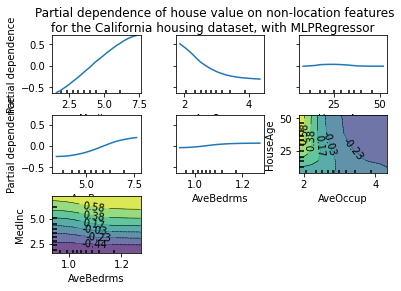

In [57]:
print('Compute and plot partial dependence')
tic = time()
features = ['MedInc','AveOccup','HouseAge','AveRooms','AveBedrms',('AveOccup', 'HouseAge'),('AveBedrms', 'MedInc')]

plot_partial_dependence(mlp, X_train, features,n_jobs=5, grid_resolution=20) 

print("done in {:.3f}s".format(time() - tic))

fig = plt.gcf()
fig.suptitle('Partial dependence of house value on non-location features\n'
             'for the California housing dataset, with MLPRegressor \n')
fig.subplots_adjust(wspace=0.4,hspace=0.4)

The median house price is approximately linearly dependent on the median income (top left plot).
The house price drops with the increase of the average occupants per household (top middle plot).
The house age and AveBedrooms does not have a strong influence on the house price; so does the average rooms per household.
The AveRooms have a slight influence on the house price.
The contour plots allow us to view the interactions of two target features, on the hours price. For example, for average occupancy greater than two, the house price is nearly independent of the house age. For average occupancy less than two, there is a dependence. **bold text** **bold text**

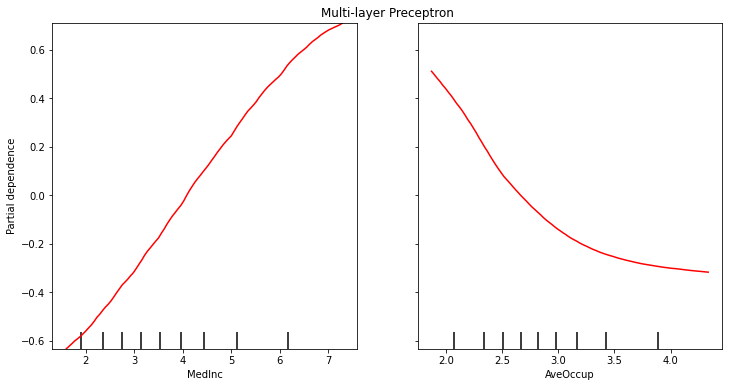

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Multi-layer Preceptron")
mlp_disp = plot_partial_dependence(mlp, X, ["MedInc", "AveOccup"], ax=ax, line_kw={"c":"red"})

**Comparison studies with other regressors**

**Gradient Boost Regressor**

In [55]:
print("Training GradientBoostingRegressor...")
tic = time()
gbr = HistGradientBoostingRegressor() 
gbr.fit(X_train, y_train)
print("done in {:.3f}s".format(time() - tic))
print("Test R2 score: {:.2f}".format(gbr.score(X_test, y_test)))

Training GradientBoostingRegressor...
done in 0.632s
Test R2 score: 0.85


Computing partial dependence plots...
done in 0.478s


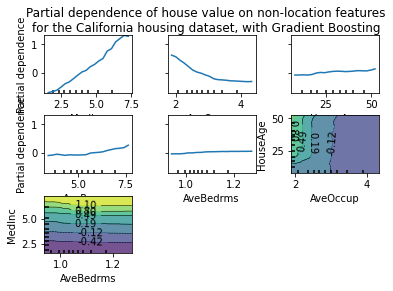

In [59]:
print('Computing partial dependence plots...')
tic = time()
features = ['MedInc','AveOccup','HouseAge','AveRooms','AveBedrms',
            ('AveOccup', 'HouseAge'),('AveBedrms', 'MedInc')]
plot_partial_dependence(gbr, X_train, features,
                        n_jobs=3, grid_resolution=20)
print("done in {:.3f}s".format(time() - tic))
#fig = plt.figure(figsize=(45, 29))
fig = plt.gcf()
fig.suptitle('Partial dependence of house value on non-location features\n'
             'for the California housing dataset, with Gradient Boosting\n')
fig.subplots_adjust(wspace=0.4, hspace=0.4)

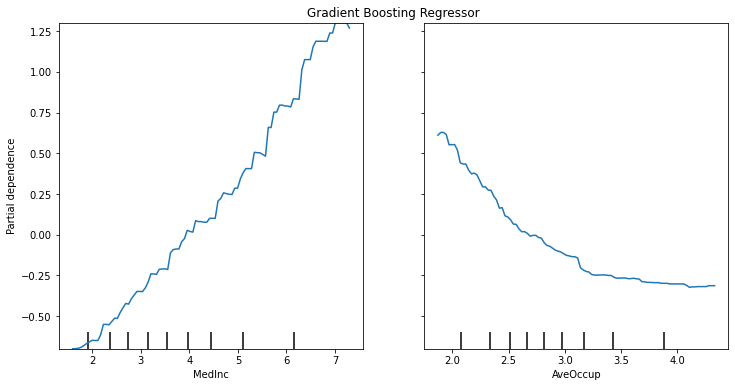

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Gradient Boosting Regressor")
gbr_disp = plot_partial_dependence(gbr, X_train, ["MedInc", "AveOccup"], ax=ax)

**Decision Tree Regressor**

In [61]:
print("Training DecisionTreeRegressor...")
tic = time()
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print("done in {:.3f}s".format(time() - tic))
print("Test R2 score: {:.2f}".format(tree.score(X_test, y_test)))

Training DecisionTreeRegressor...
done in 0.241s
Test R2 score: 0.59


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


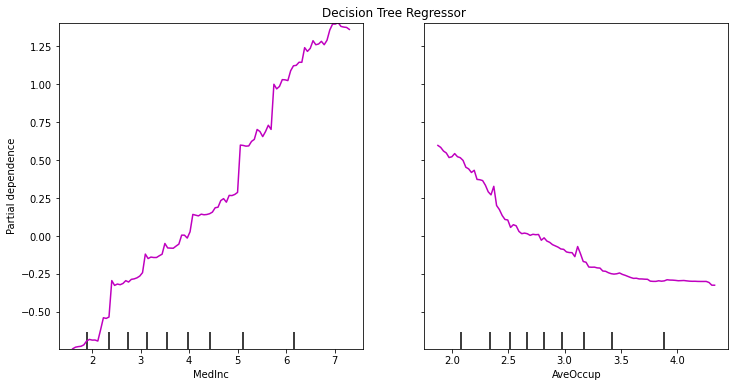

In [62]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree Regressor")
tree_disp = plot_partial_dependence(tree, X, ["MedInc", "AveOccup"], ax=ax,
                                   line_kw={"c": "m"})

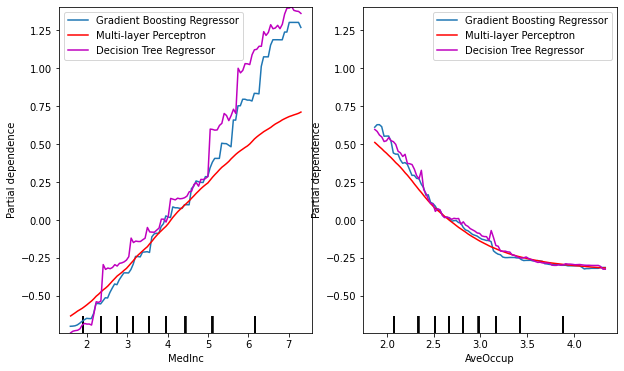

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
gbr_disp.plot(ax=[ax1, ax2], line_kw={"label": "Gradient Boosting Regressor"})
mlp_disp.plot(ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron",
                                      "c": "red"})
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree Regressor",
                                      "c": "m"})
ax1.legend()
ax2.legend()

**We observe that Multi-layer Preveptron (MLP) prediction curves are much smoother than the Gradient Boosting Regressor.**